# Predicting Student Loan Repayment
              Tyler Matheny, Phd
        University of Colorado at Boulder
           Department of Biochemistry

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# Student Loans Are a HUGE Problem

* Total student loan debt is now 1.5 trillion dollars.  Currently the U.S. government's largest asset


* 70% of students graduate with significant amounts of student loan debt.  The average borrower takes out $40,000 in student loans


* About half of college graduates have made no progress on student loans 5 years after graduation

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# How did we get here?

### The demand for education has become inelastic
* Student loans are non-dischargeable in bankruptcy


* Allows lenders to mitigate risk associated with student loans


* Leaves the burden of the decision to attend college on student borrowers

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# How can we fix the student loan crisis?

### (1) Change government policies
### (2) Educate students about the reality of repayment

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# The College scorecard provides around 2GB of data on student loan defualt rates, repayment rates, test scores, and student demographics

# Let's look at some data

The data used in this analysis was downloaded from CollegeScorecard: https://collegescorecard.ed.gov/data/

College Scorecard Data: https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

Post School Earnings: https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv

The following code will download and unzip the datasets.

In [6]:
import os as os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib as plt

/Users/tyler-matheny/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
# Download the data
import wget
import os as os
import zipfile
url_1 = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip' 
url_2 = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv'
def getdata(url):
    directory = os.getcwd()
    wget.download(url, directory)
    if url.endswith('.zip'):
        with zipfile.ZipFile("CollegeScorecard_Raw_Data.zip","r") as zip_ref:
            zip_ref.extractall(directory)
getdata(url_1)
getdata(url_2)

# 1.  Changing Government Policy

## Pell Grants are doing more harm than good

* Pell Grants are government grants for students from low-income families who need help paying for college. 

* By analyzing data in CollegeScorecard, I found that Pell grants are strongly correlated with poor repayment outcomes

* The only schools that seem to escape this trend are ones with rigorous entrance exam requirements and good completion rates

* This suggests that Pell grants may be incentivising students to go college who are not prepared for college 

[Text(0,0.5,'Repayment Rate'),
 Text(0.5,0,'Fraction of Students Receiving Pell Grants')]

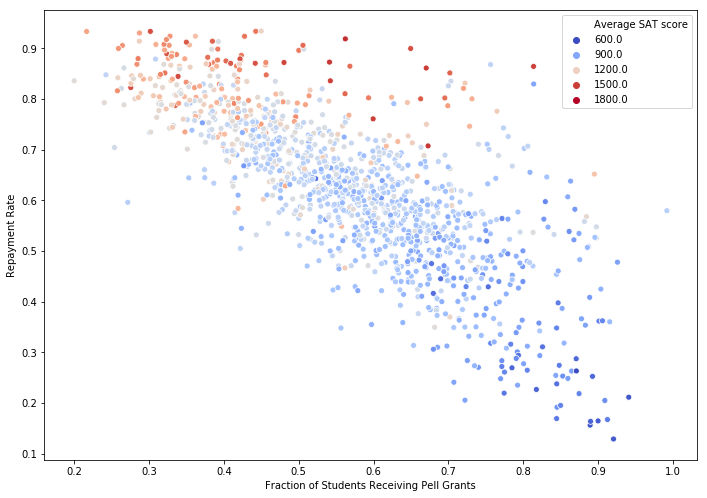

In [8]:
scorecard_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',low_memory = False)
treasury_elements = pd.read_csv('Most-Recent-Cohorts-Treasury-Elements.csv')
%matplotlib inline
x = scorecard_data[['PELL_EVER', 'RPY_3YR_RT', 'SAT_AVG']]
x = x.rename(index=str, columns={"SAT_AVG": "Average SAT score"})
x = x.apply(pd.to_numeric, errors='coerce')
a4_dims = (11.7, 8.27)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
y = sns.scatterplot(x="PELL_EVER", y="RPY_3YR_RT", hue = "Average SAT score", palette= "coolwarm", data=x)
y.set(xlabel='Fraction of Students Receiving Pell Grants', ylabel='Repayment Rate')

### Pell Grants only seem to be helping students who attend Universities with rigorous entrance exam requirements.


[Text(0,0.5,'Repayment Rate'),
 Text(0.5,0,'Fraction of Students Receiving Pell Grants')]

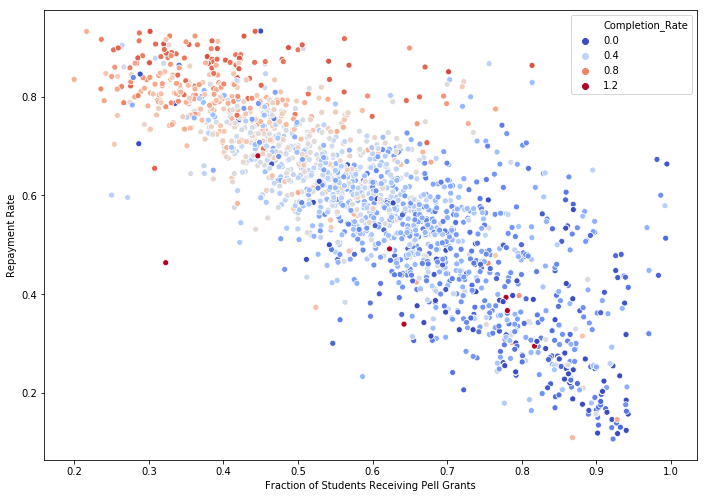

In [9]:
scorecard_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',low_memory = False)
treasury_elements = pd.read_csv('Most-Recent-Cohorts-Treasury-Elements.csv')
%matplotlib inline
x = scorecard_data[['PELL_EVER', 'RPY_3YR_RT', 'C100_4']]
x = x.rename(index=str, columns={"C100_4": "Completion_Rate"})
x = x.apply(pd.to_numeric, errors='coerce')
a4_dims = (11.7, 8.27)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
y = sns.scatterplot(x="PELL_EVER", y="RPY_3YR_RT", hue = "Completion_Rate", palette= "coolwarm", data=x)
y.set(xlabel='Fraction of Students Receiving Pell Grants', ylabel='Repayment Rate')

### This is likely due to schools with large numbers of students recieving Pell grants having poor completion rates

# 2. Educating Students - Student Loan Repayment Calculator

* During my exploratory data analysis, I found that two factors were far more predictive of repayment than any other: Family Income and SAT/ACT scores
* Using Ordinary Least Squares Regression I foun that these two factors account for >95% of the varience in repayment rates
* Using these two factors, I made a linear regression machine learning model to help students better understand their odds of repayment (r2 score on test data = .703)

[Text(0,0.5,'Average SAT score'), Text(0.5,0,'Median Family Income')]

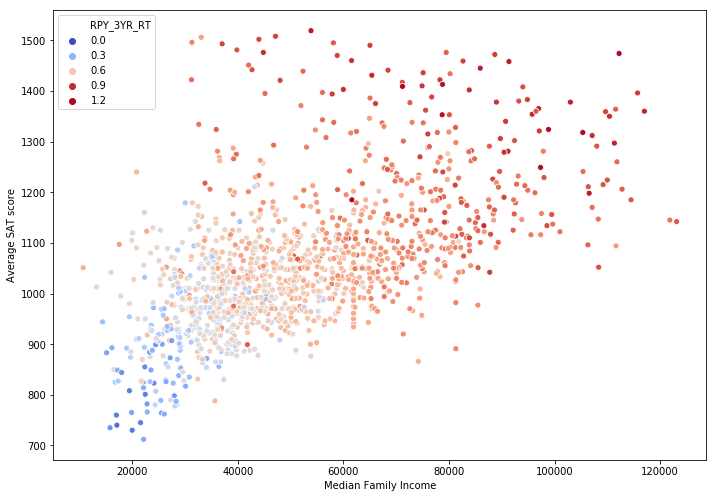

In [10]:
%matplotlib inline
x = scorecard_data[['MD_FAMINC', 'RPY_3YR_RT', 'SAT_AVG']]
x = x.apply(pd.to_numeric, errors='coerce')
a4_dims = (11.7, 8.27)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
y = sns.scatterplot(x="MD_FAMINC", y="SAT_AVG", hue = "RPY_3YR_RT", palette= "coolwarm",  data=x)
y.set(xlabel='Median Family Income', ylabel='Average SAT score')

### Median family income and SAT scores are extremely predictive of student loan repayment
This is good, because this is information students can easily obtain

# Ordinary Least Squares Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats

machine_learning_data = scorecard_data[['SAT_AVG','MD_FAMINC','RPY_3YR_RT']]
machine_learning_data = machine_learning_data.apply(pd.to_numeric, errors='coerce')
machine_learning_data = machine_learning_data.dropna()
X_loan = machine_learning_data[[ 'SAT_AVG','MD_FAMINC']]
y_loan = machine_learning_data['RPY_3YR_RT']
min_max_scaler = preprocessing.MinMaxScaler()
X_loan_minmax = min_max_scaler.fit_transform(X_loan)

est = sm.OLS(y_loan, X_loan_minmax).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             RPY_3YR_RT   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Wed, 20 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:08:39   Log-Likelihood:                 755.25
No. Observations:                1286   AIC:                            -1507.
Df Residuals:                    1284   BIC:                            -1496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8756      0.022     40.053      0.0

# Linear Regression Machine Learning Analysis

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_loan_minmax, y_loan,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)

linear model intercept: 0.3128805091064447
linear model coeff:
[ 0.38915152  0.39930972]
R-squared score (training): 0.704
R-squared score (test): 0.703


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Student loan repayment calculator examples